In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from pathlib import Path
import sys
# Set sys path
sys.path.append(str(Path(os.getcwd()).parent))

In [3]:
# Adjust matplotlib settings for font inclusion
plt.rcParams['pdf.fonttype'] = 42  # Use Type 3 (PostScript) fonts
plt.rcParams['ps.fonttype'] = 42

# Set filpaths for data and figures
notebook_dir = os.getcwd()
file_path = Path(notebook_dir).parent / 'data' 

# Load data

In [4]:
df = pd.read_csv(file_path / "Scivias_PCAN_pg.tsv", sep='\t')
gene_dict_PCAN = dict(zip(df['Protein.Group'], df['Genes']))
prot_PCAN = df.set_index('Protein.Group').iloc[:,4:].T
prot_PCAN.index = [a.split('/')[-1] for a in prot_PCAN.index]
prot_PCAN.index = [a.split('.')[0] for a in prot_PCAN.index]
prot_PCAN = np.log10(prot_PCAN.replace(0, np.nan))

In [5]:
position = []
plate = []
for a in prot_PCAN.index:
    position.append(a.split('_')[-1])
    plate.append(a.split('_')[-2])

In [6]:
reindex =[]
for a, b in zip(plate, position):
    reindex.append(a+'_'+b)

In [7]:
prot_PCAN.index = reindex

In [8]:
df = pd.read_csv(file_path / "Scivias_neat_pg.tsv", sep='\t')
gene_dict_neat = dict(zip(df['Protein.Group'], df['Genes']))
prot_neat = df.set_index('Protein.Group').drop(['Protein.Names', 'Genes', 'protein'], axis=1).T
prot_neat.index = [a.split('/')[-1] for a in prot_neat.index]
prot_neat.index = [a.split('.')[0] for a in prot_neat.index]
prot_neat = np.log10(prot_neat.replace(0, np.nan))

In [9]:
position = []
plate = []
for a in prot_neat.index:
    position.append(a.split('_')[-4])
    plate.append(a.split('_')[-5])

In [10]:
position_=[]
for a in position:
    if pd.isna(a) == True:
        position_.append('missing')
    elif len(a[1:]) >1:
        position_.append(a)
    elif len(a[1:]) <=1:
        position_.append(a[:1]+'0'+a[1:])
    else:
        print(a)

In [11]:
plate_=[]
for a in plate:
    if pd.isna(a) == True:
        plate_.append('missing')
    elif len(a[1:]) >1:
        plate_.append(a)
    elif len(a[1:]) <=1:
        plate_.append(a[:1]+'0'+a[1:])
    else:
        print(a)

In [12]:
reindex =[]
for a, b in zip(plate_, position_):
    reindex.append(a+'_'+b)

In [13]:
prot_neat.index = reindex

In [14]:
d_groups = pd.read_csv(file_path / "Scivias_metadata_new.csv", sep=',')

In [15]:
plate=[]
for a in d_groups['Plate_plasma']:
    if pd.isna(a) == True:
        plate.append('missing')
    elif int(a) >9:
        plate.append('P'+str(int(a)))
    elif int(a) < 10:
        plate.append('P0'+str(int(a)))
    else:
        print(a)

In [16]:
position=[]
for a in d_groups['Well_plasma']:
    if pd.isna(a) == True:
        position.append('missing')
    elif len(a[1:]) >1:
        position.append(a)
    elif len(a[1:]) <=1:
        position.append(a[:1]+'0'+a[1:])
    else:
        print(a)

In [17]:
reindex =[]
for a, b in zip(plate, position):
    reindex.append(a+'_'+b)

In [18]:
d_groups['index_PCAN'] = reindex
cat = d_groups.set_index('index_PCAN')[['sct_description']]

In [19]:
cat = cat[~cat.index.isin(['missing_missing'])]

In [20]:
cat['sct_description'].value_counts()

sct_description
Well child (finding)                                             111
Cystic fibrosis (disorder)                                        76
Celiac disease (disorder)                                         65
Diabetes mellitus type 1 (disorder)                               27
Crohn's disease (disorder)                                        24
                                                                ... 
Autoimmune neutropenia (disorder)                                  1
Inactive tuberculosis (disorder)                                   1
Tubulointerstitial nephritis with uveitis syndrome (disorder)      1
Thalamic infarction (disorder)                                     1
Recurrent infectious disease (disorder)                            1
Name: count, Length: 363, dtype: int64

In [26]:
prot_neat = prot_neat.loc[prot_neat.index.intersection(cat.index)]
prot_PCAN = prot_PCAN.loc[prot_PCAN.index.intersection(cat.index)]
cat_neat = cat.loc[prot_neat.index]
cat_PCAN = cat.loc[prot_PCAN.index]

In [109]:
cat_PCAN

sct_description  cluster
P01_A01  Juvenile idiopathic arthritis, oligoarthritis ...       28
P01_A02                   Prader-Willi syndrome (disorder)       35
P01_A03            Systemic lupus erythematosus (disorder)       12
P01_A04               Hemolytic uremic syndrome (disorder)       40
P01_A05                         Cystic fibrosis (disorder)       11
...                                                    ...      ...
P14_B04                  Adrenogenital disorder (disorder)       37
P14_B05                  Adrenogenital disorder (disorder)       37
P14_B06                  Adrenogenital disorder (disorder)       37
P14_B07                  Adrenogenital disorder (disorder)       37
P14_B08                  Adrenogenital disorder (disorder)       37

[1047 rows x 2 columns]

In [110]:
cat_neat

sct_description  cluster
P01_A10  Pancytopenia due to IKAROS family zinc finger ...        4
P01_A11  Juvenile idiopathic arthritis, oligoarthritis ...       28
P01_A01  Juvenile idiopathic arthritis, oligoarthritis ...       28
P01_A02                   Prader-Willi syndrome (disorder)       35
P01_A03            Systemic lupus erythematosus (disorder)       12
...                                                    ...      ...
P14_B04                  Adrenogenital disorder (disorder)       37
P14_B05                  Adrenogenital disorder (disorder)       37
P14_B06                  Adrenogenital disorder (disorder)       37
P14_B07                  Adrenogenital disorder (disorder)       37
P14_B08                  Adrenogenital disorder (disorder)       37

[1081 rows x 2 columns]

In [35]:
df = pd.read_csv(file_path / "Scivias_urine_pg.tsv", sep='\t')
gene_dict_urine = dict(zip(df['Protein.Group'], df['Genes']))
prot_urine = df.set_index('Protein.Group').drop(['Protein.Names', 'Genes', 'protein'], axis=1).T
prot_urine = np.log10(prot_urine.replace(0, np.nan))

In [36]:
prot_urine.index = ['_'.join(a.split('_')[:6]) + '_' + a.split('_')[-1] for a in prot_urine.index]

In [37]:
prot_urine

Protein.Group                               A0A075B6H7  A0A075B6H9  \
20231103_TIMS02_ErIt_SA_I775_1000_target4     3.795799         NaN   
20231103_TIMS02_ErIt_SA_I775_1000_target8          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target4          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target8          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1002_target4          NaN         NaN   
...                                                ...         ...   
20231127_TIMS02_ErIt_SA_I775_P1516_target8         NaN         NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target4         NaN         NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target8         NaN         NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target4         NaN         NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target8         NaN         NaN   

Protein.Group                               A0A075B6H9;A0A075B6K6;A0A0B4J1Y8  \
20231103_TIMS02_ErIt_SA_I775_1000_target4                                NaN   
20231103_TIMS02_ErIt_SA_I775_1000_target8                                NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target4                                NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target8                                NaN   
20231103_TIMS02_ErIt_SA_I775_1002_target4                                NaN   
...                                                                      ...   
20231127_TIMS02_ErIt_SA_I775_P1516_target8                               NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target4                               NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target8                               NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target4                               NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target8                               NaN   

Protein.Group                               A0A075B6I0  \
20231103_TIMS02_ErIt_SA_I775_1000_target4          NaN   
20231103_TIMS02_ErIt_SA_I775_1000_target8          NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target4          NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target8          NaN   
20231103_TIMS02_ErIt_SA_I775_1002_target4          NaN   
...                                                ...   
20231127_TIMS02_ErIt_SA_I775_P1516_target8         NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target4    4.133917   
20231127_TIMS02_ErIt_SA_I775_P1516_target8    3.619520   
20231127_TIMS02_ErIt_SA_I775_P1516_target4    4.142456   
20231127_TIMS02_ErIt_SA_I775_P1516_target8    4.060286   

Protein.Group                               A0A075B6I7;A0A087WSX0;A0A0G2JS06  \
20231103_TIMS02_ErIt_SA_I775_1000_target4                                NaN   
20231103_TIMS02_ErIt_SA_I775_1000_target8                                NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target4                                NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target8                                NaN   
20231103_TIMS02_ErIt_SA_I775_1002_target4                                NaN   
...                                                                      ...   
20231127_TIMS02_ErIt_SA_I775_P1516_target8                          3.471418   
20231127_TIMS02_ErIt_SA_I775_P1516_target4                          3.652923   
20231127_TIMS02_ErIt_SA_I775_P1516_target8                               NaN   
20231127_TIMS02_ErIt_SA_I775_P1516_target4                          3.667848   
20231127_TIMS02_ErIt_SA_I775_P1516_target8                          3.823438   

Protein.Group                               A0A075B6I9  A0A075B6J9  \
20231103_TIMS02_ErIt_SA_I775_1000_target4          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1000_target8          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target4          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1001_target8          NaN         NaN   
20231103_TIMS02_ErIt_SA_I775_1002_target4          NaN         NaN   
...                                                ...         ...   
20231127_TIMS02_ErIt_SA_I775_P1516_target8        

In [40]:
d_groups = pd.read_csv(file_path / "Scivias_metadata_new.csv", sep=',')

In [41]:
out = []
for a, b in zip(d_groups['Run_urine'], d_groups['Channel_urine']):
    try:
        if b=='d4':
            out.append(a+'_'+'target4')
        elif b=='d8':
            out.append(a+'_'+'target8')
        else:
            out.append(np.nan)
    except:
        out.append(np.nan)

d_groups['urine_index'] = out

In [42]:
plate=[]
for a in d_groups['Plate_urine']:
    if pd.isna(a) == True:
        plate.append('missing')
    elif int(a) >9:
        plate.append('P'+str(int(a)))
    elif int(a) < 10:
        plate.append('P0'+str(int(a)))
    else:
        print(a)

In [43]:
position=[]
for a in d_groups['Well_urine']:
    if pd.isna(a) == True:
        position.append('missing')
    elif len(a[1:]) >1:
        position.append(a)
    elif len(a[1:]) <=1:
        position.append(a[:1]+'0'+a[1:])
    else:
        print(a)

In [44]:
reindex =[]
for a, b in zip(plate, position):
    reindex.append(a+'_'+b)
d_groups['index_urine'] = reindex

In [45]:
d_groups

Study.Id     Sex  Age_years  Age_months     Status  \
0     KK-SCIVIAS-00004  female         13         166  Diagnosed   
1     KK-SCIVIAS-00005    male         16         196  Diagnosed   
2     KK-SCIVIAS-00006  female          5          70  Diagnosed   
3     KK-SCIVIAS-00006  female          5          70  Diagnosed   
4     KK-SCIVIAS-00007  female         16         192  Diagnosed   
...                ...     ...        ...         ...        ...   
1229  KK-SCIVIAS-02737  female          6          75  Diagnosed   
1230  KK-SCIVIAS-02738    male          4          51  Diagnosed   
1231  KK-SCIVIAS-02742  female         16         195  Diagnosed   
1232  KK-SCIVIAS-02757  female          6          72    Control   
1233  KK-SCIVIAS-02787    male         11         138  Diagnosed   

                                               sct_term         sct_code  \
0                 34000006 | Crohn's disease (disorder)         34000006   
1                 34000006 | Crohn's disease (disorder)         34000006   
2                   9826008 | Conjunctivitis (disorder)          9826008   
3     717231003 | Periodic fever and aphthous stomat...        717231003   
4     1204420006 | Chronic nonbacterial osteomyeliti...       1204420006   
...                                                 ...              ...   
1229  451991000124106 | Recurrent infectious disease...  451991000124106   
1230              396331005 | Celiac disease (disorder)        396331005   
1231  449890002 | Functional abdominal pain syndrome...        449890002   
1232                   102506008 | Well child (finding)        102506008   
1233  86406008 | Human immunodeficiency virus infect...         86406008   

                                        sct_description genetically_confirmed  \
0                            Crohn's disease (disorder)                    no   
1                            Crohn's disease (disorder)                    no   
2                             Conjunctivitis (disorder)                    no   
3     Periodic fever and aphthous stomatitis with ph...                    no   
4     Chronic nonbacterial osteomyelitis/chronic rec...                    no   
...                                                 ...                   ...   
1229            Recurrent infectious disease (disorder)                    no   
1230                          Celiac disease (disorder)                    no   
1231      Functional abdominal pain syndrome (disorder)                    no   
1232                               Well child (finding)                    no   
1233  Human immunodeficiency virus infection (disorder)                    no   

     Urine  Plate_urine Well_urine                          Run_urine  \
0     True          2.0         C2   20231103_TIMS02_ErIt_SA_I775_977   
1     True          2.0         G9  20231103_TIMS02_ErIt_SA_I775_1032   
2     True          2.0         D9   20231103_TIMS02_ErIt_SA_I775_996   
3     True          2.0         D9   20231103_TIMS02_ErIt_SA_I775_996   
4     True          4.0         B8  20231106_TIMS02_ErIt_SA_I775_1062   
...    ...          ...        ...                                ...   
1229   NaN          NaN        NaN                                NaN   
1230   NaN          NaN        NaN                                NaN   
1231   NaN          NaN        NaN                                NaN   
1232   NaN          NaN        NaN                                NaN   
1233   NaN          NaN        NaN                                NaN   

     Channel_urine Plasma  Plate_plasma Well_plasma  \
0               d8    NaN           NaN         NaN   
1               d4   True           2.0          G9   
2               d8   True           2.0          D9   
3               d8   True           2.0          D9   
4               d8   True           4.0          B8   
...            ...    ...           ...         ...   
1229           NaN   True          12.0          

In [46]:

cat_urine = d_groups.set_index('index_urine')[['sct_description']]

In [47]:
cat_urine = cat_urine[~cat_urine.index.isin(['missing_missing'])]

In [48]:
urine_index_dict = dict(zip(d_groups['urine_index'], d_groups['index_urine']))

In [49]:
prot_urine.index = [urine_index_dict[a] if a in urine_index_dict else a for a in prot_urine.index]

In [50]:
prot_urine = prot_urine[~prot_urine.index.str.contains('P1516')]

In [53]:
prot_urine = prot_urine.loc[prot_urine.index.intersection(cat_urine.index)]
cat_urine = cat_urine.loc[prot_urine.index]

In [54]:
prot_urine

Protein.Group  A0A075B6H7  A0A075B6H9  A0A075B6H9;A0A075B6K6;A0A0B4J1Y8  \
P02_E01          3.795799         NaN                               NaN   
P01_E01               NaN         NaN                               NaN   
P02_E02               NaN         NaN                               NaN   
P01_E02               NaN         NaN                               NaN   
P02_E03               NaN         NaN                               NaN   
...                   ...         ...                               ...   
P12_H05               NaN         NaN                               NaN   
P11_H06          3.904665         NaN                               NaN   
P12_H06          4.207885         NaN                               NaN   
P11_H07               NaN         NaN                               NaN   
P12_H07               NaN         NaN                               NaN   

Protein.Group  A0A075B6I0  A0A075B6I7;A0A087WSX0;A0A0G2JS06  A0A075B6I9  \
P02_E01               NaN                               NaN         NaN   
P01_E01               NaN                               NaN         NaN   
P02_E02               NaN                               NaN         NaN   
P01_E02               NaN                               NaN         NaN   
P02_E03               NaN                               NaN         NaN   
...                   ...                               ...         ...   
P12_H05          3.971022                               NaN         NaN   
P11_H06          3.421413                               NaN    3.121036   
P12_H06          3.856161                               NaN    3.824288   
P11_H07               NaN                               NaN         NaN   
P12_H07               NaN                               NaN         NaN   

Protein.Group  A0A075B6J9  A0A075B6K0;A0A075B6K4  A0A075B6K4  A0A075B6K5  ...  \
P02_E01               NaN                    NaN         NaN         NaN  ...   
P01_E01               NaN                    NaN         NaN         NaN  ...   
P02_E02               NaN                    NaN         NaN         NaN  ...   
P01_E02               NaN                    NaN         NaN         NaN  ...   
P02_E03               NaN                    NaN         NaN         NaN  ...   
...                   ...                    ...         ...         ...  ...   
P12_H05               NaN                    NaN         NaN         NaN  ...   
P11_H06               NaN                    NaN    3.292871    2.943095  ...   
P12_H06               NaN                    NaN         NaN         NaN  ...   
P11_H07               NaN                    NaN         NaN         NaN  ...   
P12_H07               NaN                    NaN         NaN         NaN  ...   

Protein.Group  Q9Y6I3;Q9Y6I3-1;Q9Y6I3-3  Q9Y6N5  \
P02_E01                             NaN     NaN   
P01_E01                             NaN     NaN   
P02_E02                             NaN     NaN   
P01_E02                             NaN     NaN   
P02_E03                             NaN     NaN   
...                                 ...     ...   
P12_H05                             NaN     NaN   
P11_H06                             NaN     NaN   
P12_H06                             NaN     NaN   
P11_H07                             NaN     NaN   
P12_H07                             NaN     NaN   

Protein.Group  Q9Y6R1;Q9Y6R1-2;Q9Y6R1-3;Q9Y6R1-4;Q9Y6R1-5    Q9Y6R7  \
P02_E01                                          3.121643  3.721806   
P01_E01                                               NaN       NaN   
P02_E02                                               NaN  4.459232   
P01_E02                                               NaN       NaN   
P02_E03                                               NaN  4.050161   
...                                                   ...       ...   
P12_H05                                               NaN  4.114033   
P11_H06                                     

In [55]:
cat_urine

sct_description
P02_E01                Diabetes mellitus type 1 (disorder)
P01_E01             Disorder of immune function (disorder)
P02_E02             Immunoglobulin G deficiency (disorder)
P01_E02               Hemolytic uremic syndrome (disorder)
P02_E03          Osteogenesis imperfecta type I (disorder)
...                                                    ...
P11_H06  Periodic fever and aphthous stomatitis with ph...
P12_H06                                  Asthma (disorder)
P12_H06                       Headache disorder (disorder)
P11_H07          Chronic kidney disease stage 3 (disorder)
P12_H07  Abscess of skin and/or subcutaneous tissue (di...

[1078 rows x 1 columns]

In [56]:
cat_urine['sct_description'].value_counts()

sct_description
Well child (finding)                        113
Cystic fibrosis (disorder)                   65
Celiac disease (disorder)                    64
Diabetes mellitus type 1 (disorder)          28
Crohn's disease (disorder)                   25
                                           ... 
Autoimmune cholangitis (disorder)             1
Chronic granulomatous disease (disorder)      1
Transplanted heart present (finding)          1
Thalamic infarction (disorder)                1
Sigmoid volvulus (disorder)                   1
Name: count, Length: 360, dtype: int64

# save for later and other use

In [57]:
prot_PCAN.to_csv(file_path / "Scivias_PCAN_proteins.tsv", sep='\t')
prot_neat.to_csv(file_path / "Scivias_neat_proteins.tsv", sep='\t')
prot_urine.to_csv(file_path / "Scivias_urine_proteins.tsv", sep='\t')
cat.to_csv(file_path / "Scivias_plasma_metadata.tsv", sep='\t')
cat_urine.to_csv(file_path / "Scivias_urine_metadata.tsv", sep='\t')

# xgboost with holdout_batch testset and scambled labels

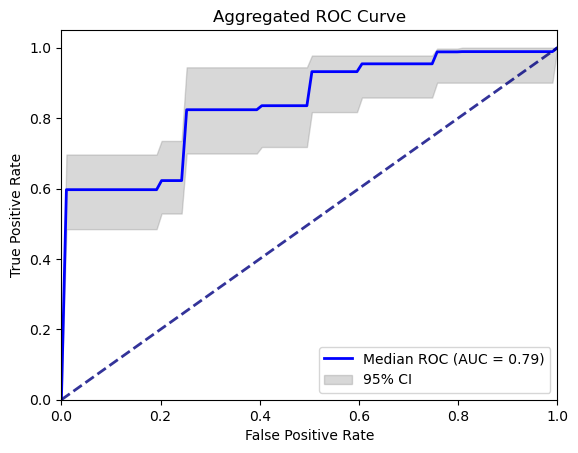

In [58]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN, cat, gene_dict_PCAN, between='sct_description')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot("Diabetes mellitus type 1 (disorder)", 'Well child (finding)', n_runs=10, n_estimators=100)

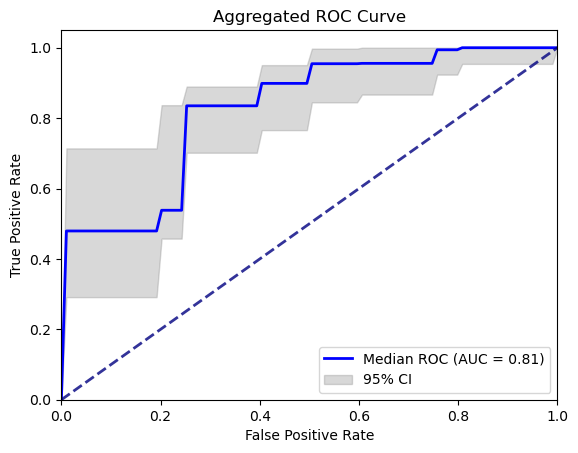

In [55]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_neat, cat, gene_dict_neat, between='sct_description')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot("Diabetes mellitus type 1 (disorder)", 'Well child (finding)', n_runs=10, n_estimators=100)

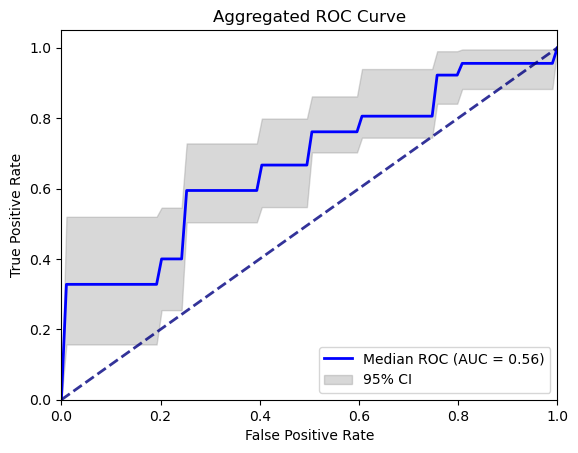

In [56]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_urine, cat_urine, gene_dict_urine, between='sct_description')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot("Diabetes mellitus type 1 (disorder)", 'Well child (finding)', n_runs=10, n_estimators=100)

In [61]:
df = pd.read_csv(file_path / r"D:\Notebooks\ADAPT-MS\data\SCIVIAS_cluster_labels.csv", sep=',')

In [62]:
df

Cluster label                                      Disease nodes  \
0                0                               Well child (finding)   
1                1       46,XX disorder of sex development (disorder)   
2                1  Virilization of female due to SRY gene translo...   
3                1                         Turner syndrome (disorder)   
4                1              Thyrotropin overproduction (disorder)   
..             ...                                                ...   
390             43                            Lymphangitis (disorder)   
391             43  Acute febrile mucocutaneous lymph node syndrom...   
392             43                         Lymphadenopathy (disorder)   
393             43                            Lymphangioma (disorder)   
394             43                    Tuberculous adenitis (disorder)   

     SNOMED CT ID  Number of patients  
0     102506008.0                 131  
1     890460004.0                   3  
2     444058005.0                   1  
3      38804009.0                   1  
4      73064001.0                   1  
..            ...                 ...  
390     1415005.0                   1  
391    75053002.0                   1  
392    30746006.0                   2  
393   400178008.0                   1  
394    10893003.0                   1  

[395 rows x 4 columns]

In [63]:
cluster_dict = dict(zip(df['Disease nodes'], df['Cluster label']))

In [64]:
cat_neat['cluster'] = cat_neat['sct_description'].map(cluster_dict)
cat_neat['cluster'].value_counts()

cluster
0     111
11     88
8      85
24     79
12     76
14     54
38     53
37     47
6      44
1      35
15     33
35     25
10     24
40     24
4      23
25     22
5      20
30     20
26     20
2      19
17     18
21     17
32     15
28     15
3      14
33     13
34     11
27     10
39      9
42      6
43      5
36      5
31      5
18      4
20      4
9       4
23      4
41      4
29      4
13      4
19      3
16      2
7       2
22      1
Name: count, dtype: int64

In [65]:
cat_PCAN['cluster'] = cat_PCAN['sct_description'].map(cluster_dict)
cat_PCAN['cluster'].value_counts()

cluster
0     110
11     85
8      80
24     76
12     74
14     53
38     53
37     47
6      41
1      35
15     30
10     24
40     24
35     23
4      23
25     22
26     20
5      19
17     18
2      17
21     17
30     16
32     15
28     15
3      14
33     13
34     11
27      9
39      8
42      6
31      5
43      5
36      5
9       4
13      4
29      4
18      4
41      4
23      3
19      3
20      3
16      2
7       2
22      1
Name: count, dtype: int64

In [66]:
cat_urine['cluster'] = cat_urine['sct_description'].map(cluster_dict)
cat_urine['cluster'].value_counts()

cluster
0     113
8      83
12     77
11     76
24     72
14     69
38     56
6      46
37     42
15     38
1      37
25     29
10     29
40     28
35     27
2      21
26     20
21     19
4      18
17     16
32     15
28     15
30     14
33     13
39     12
34     12
3      12
27      9
36      6
29      6
42      6
23      5
31      4
5       4
20      4
43      4
9       4
13      4
7       3
19      3
18      3
41      2
16      1
22      1
Name: count, dtype: int64

In [148]:
cat_PCAN[cat_PCAN['cluster'] == 37]['sct_description'].value_counts()

sct_description
Adrenogenital disorder (disorder)                                                    22
Shwachman syndrome (disorder)                                                         5
Gitelman syndrome (disorder)                                                          3
Glucocorticoid deficiency with achalasia (disorder)                                   2
Adrenal cortical hypofunction (disorder)                                              2
Maturity-onset diabetes of the young, type 4 (disorder)                               1
Dubin-Johnson syndrome (disorder)                                                     1
Familial hyperreninemic hypoaldosteronism type 1A (disorder)                          1
Renal dysplasia and retinal aplasia (disorder)                                        1
Pseudohypoaldosteronism (disorder)                                                    1
Bartter syndrome (disorder)                                                           1
Glycogen storage

In [125]:
cat_PCAN.loc[cat_PCAN[cat_PCAN['cluster'] == 0].sample(50, random_state=42).index, 'train_test'] = 'train'
cat_PCAN.loc[(cat_PCAN['cluster'] == 0) & (cat_PCAN['train_test'] != 'train'), 'train_test'] = 'test'

In [126]:
cat_PCAN

sct_description  cluster train_test
P01_A01  Juvenile idiopathic arthritis, oligoarthritis ...       28        NaN
P01_A02                   Prader-Willi syndrome (disorder)       35        NaN
P01_A03            Systemic lupus erythematosus (disorder)       12        NaN
P01_A04               Hemolytic uremic syndrome (disorder)       40        NaN
P01_A05                         Cystic fibrosis (disorder)       11        NaN
...                                                    ...      ...        ...
P14_B04                  Adrenogenital disorder (disorder)       37        NaN
P14_B05                  Adrenogenital disorder (disorder)       37        NaN
P14_B06                  Adrenogenital disorder (disorder)       37        NaN
P14_B07                  Adrenogenital disorder (disorder)       37        NaN
P14_B08                  Adrenogenital disorder (disorder)       37        NaN

[1047 rows x 3 columns]

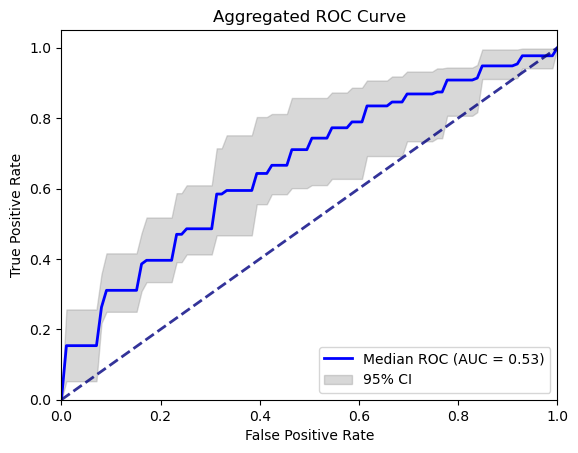

In [72]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN, cat_PCAN[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(8, 0, n_runs=10, n_estimators=100)

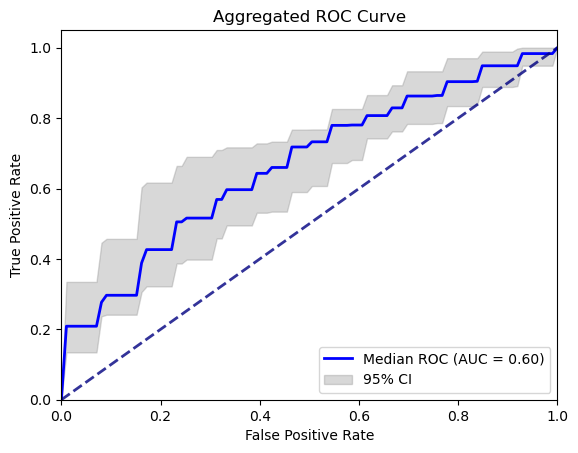

In [73]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_neat, cat_PCAN[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(8, 0, n_runs=10, n_estimators=100)

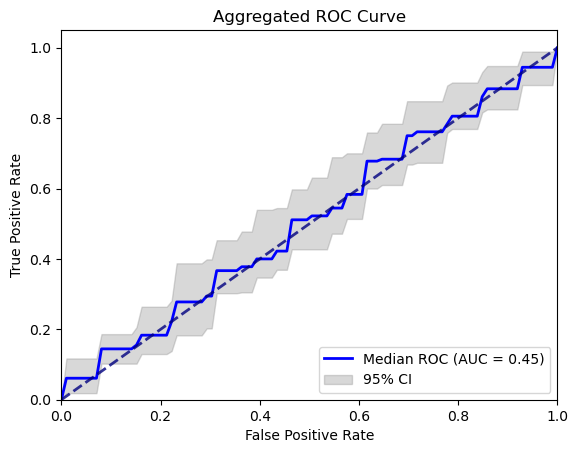

In [82]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_urine, cat_urine[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(8, 0, n_runs=10, n_estimators=100)

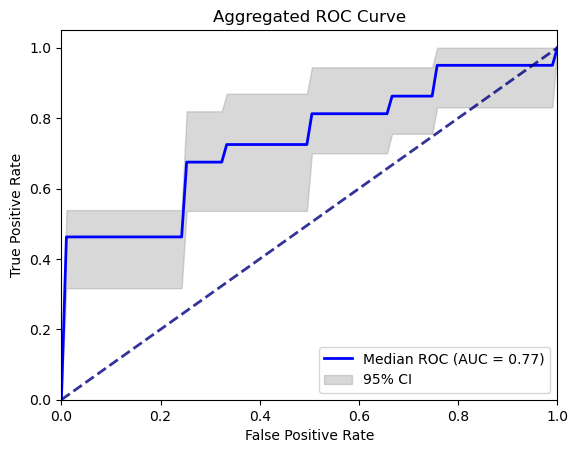

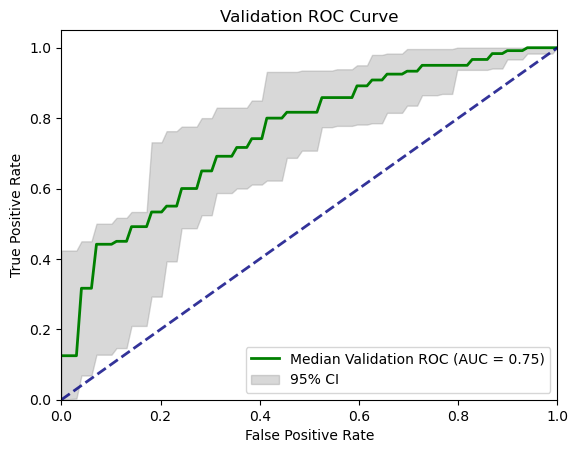

In [128]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 38) & (cat_PCAN['sct_description'] == "Crohn's disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(38, 0, n_runs=10, n_estimators=200)
baseline.validate_and_plot(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1),
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 38) & (cat_PCAN['sct_description'] != "Crohn's disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']], 38, 0)

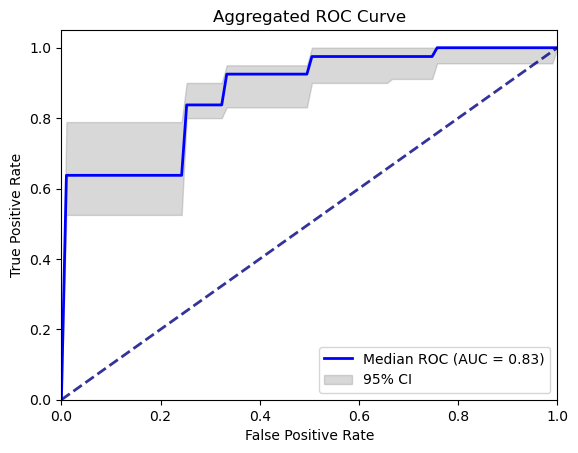

89it [00:03, 29.13it/s]


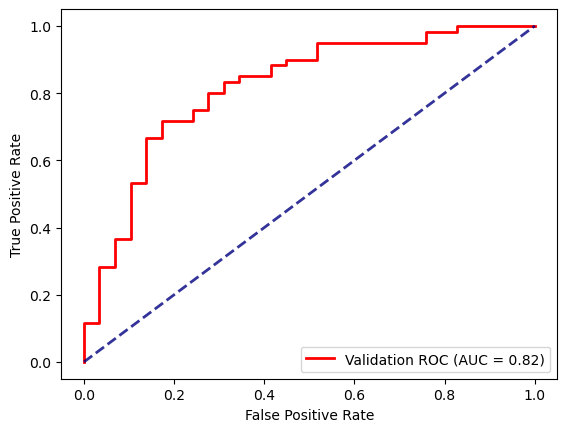

In [135]:
from utils.AdaptmsClassifier import AdaptmsClassifierDF
#Initialize the classifier
adaptms = AdaptmsClassifierDF(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 38) & (cat_PCAN['sct_description'] == "Crohn's disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot(38, 0, n_runs=10, topn_features=100)

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_dataframe(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1).loc[
                                pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 38) & (cat_PCAN['sct_description'] != "Crohn's disease (disorder)")], cat_PCAN[cat_PCAN['train_test'] == 'test']]).index], 
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 38) & (cat_PCAN['sct_description'] != "Crohn's disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']])
adaptms.plot_validation_roc(38, 0)

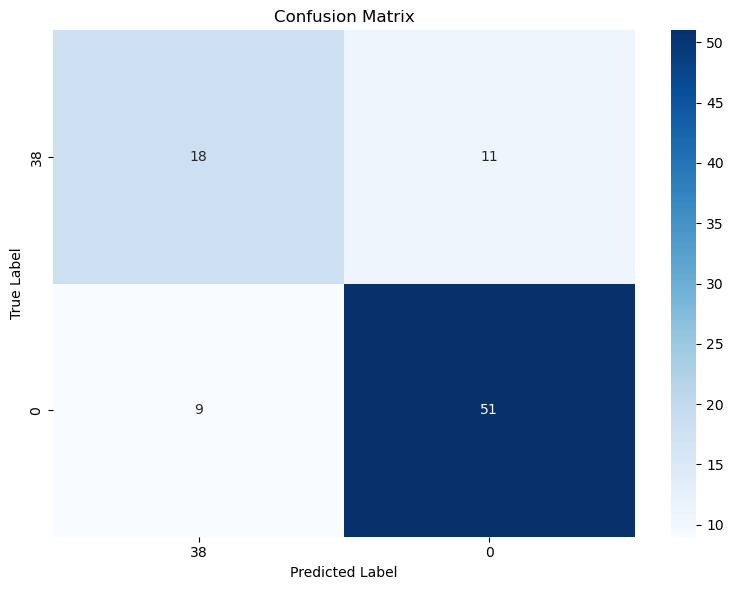

In [136]:
adaptms.plot_confusion_matrix(38,0 ,normalize=False)

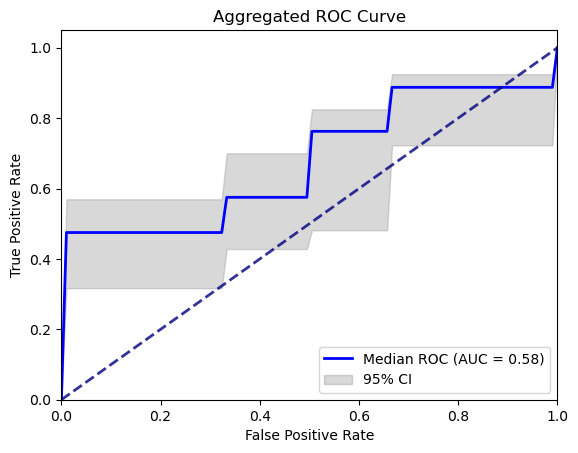

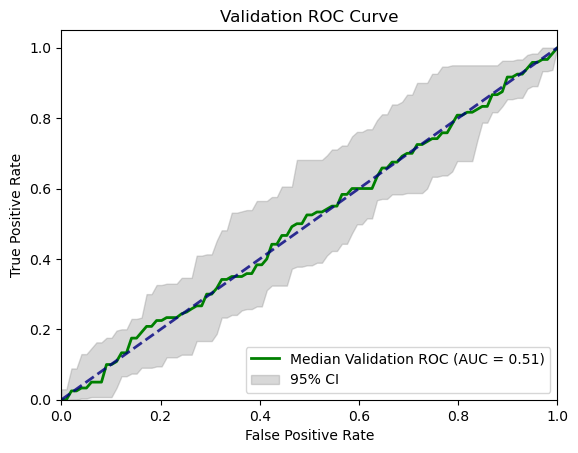

In [139]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 24) & (cat_PCAN['sct_description'] == "Hemophilia A (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(24, 0, n_runs=10, n_estimators=200)
baseline.validate_and_plot(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1),
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 24) & (cat_PCAN['sct_description'] != "Hemophilia A (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']], 24, 0)

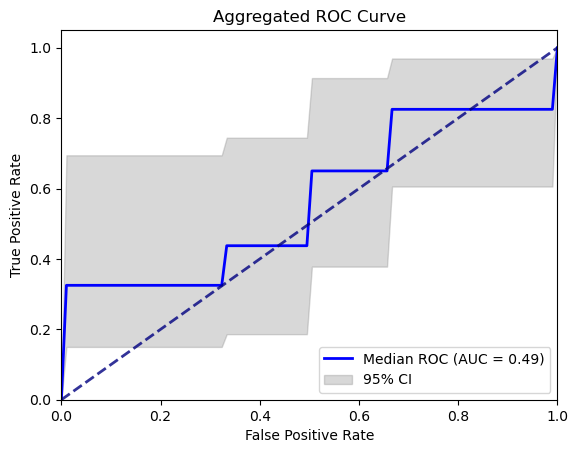

119it [00:02, 48.85it/s]


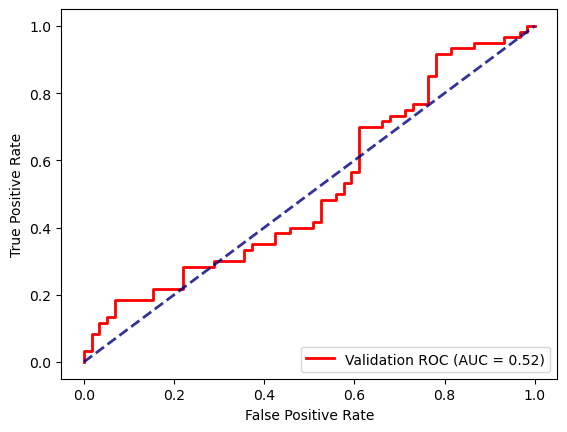

In [140]:
from utils.AdaptmsClassifier import AdaptmsClassifierDF
#Initialize the classifier
adaptms = AdaptmsClassifierDF(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 24) & (cat_PCAN['sct_description'] == "Hemophilia A (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot(24, 0, n_runs=10, topn_features=100)

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_dataframe(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1).loc[
                                pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 24) & (cat_PCAN['sct_description'] != "Hemophilia A (disorder)")], cat_PCAN[cat_PCAN['train_test'] == 'test']]).index], 
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 24) & (cat_PCAN['sct_description'] != "Hemophilia A (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']])
adaptms.plot_validation_roc(24, 0)

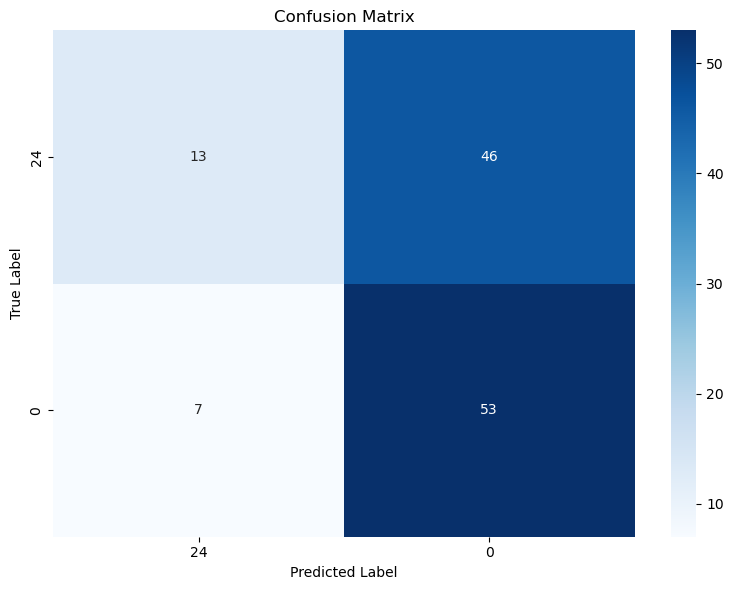

In [141]:
adaptms.plot_confusion_matrix(24,0 ,normalize=False)

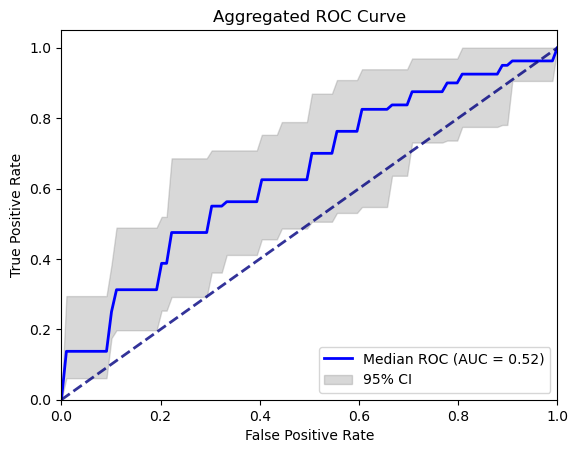

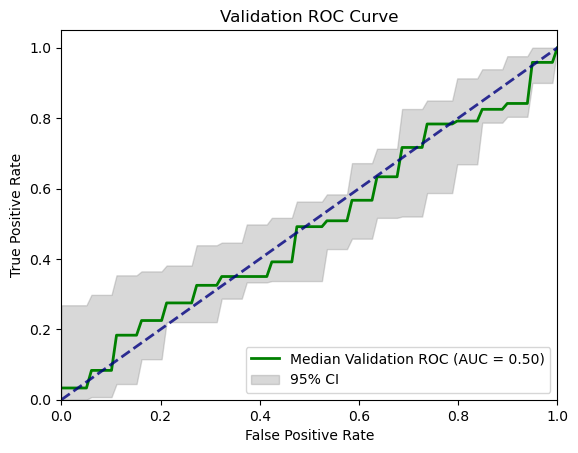

In [142]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 8) & (cat_PCAN['sct_description'] == "Celiac disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(8, 0, n_runs=10, n_estimators=200)
baseline.validate_and_plot(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1),
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 8) & (cat_PCAN['sct_description'] != "Celiac disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']], 8, 0)

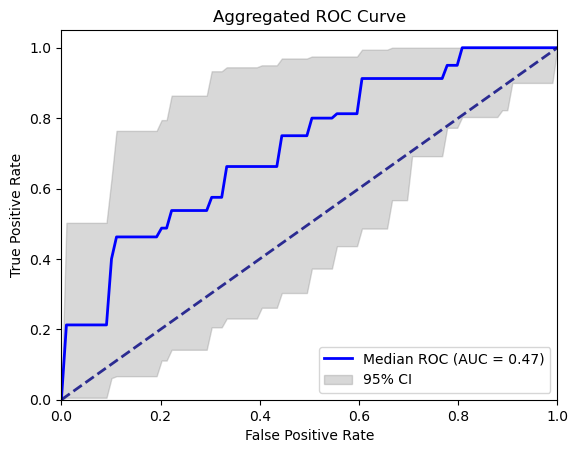

79it [00:02, 30.66it/s]


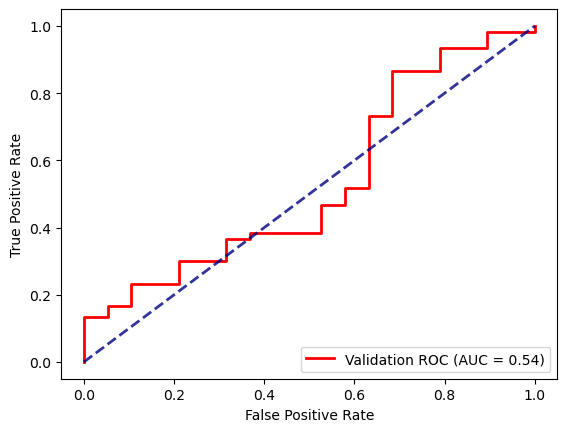

In [143]:
from utils.AdaptmsClassifier import AdaptmsClassifierDF
#Initialize the classifier
adaptms = AdaptmsClassifierDF(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 8) & (cat_PCAN['sct_description'] == "Celiac disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot(8, 0, n_runs=10, topn_features=100)

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_dataframe(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1).loc[
                                pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 8) & (cat_PCAN['sct_description'] != "Celiac disease (disorder)")], cat_PCAN[cat_PCAN['train_test'] == 'test']]).index], 
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 8) & (cat_PCAN['sct_description'] != "Celiac disease (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']])
adaptms.plot_validation_roc(8, 0)

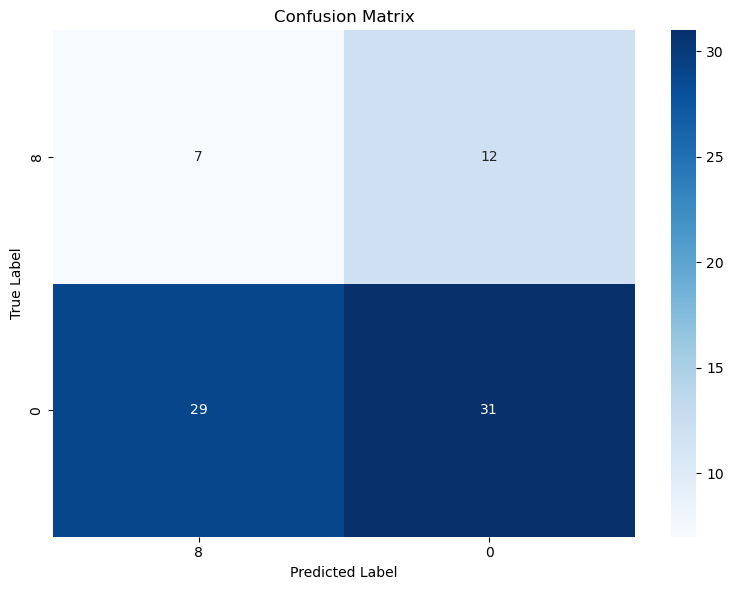

In [144]:
adaptms.plot_confusion_matrix(8,0 ,normalize=False)

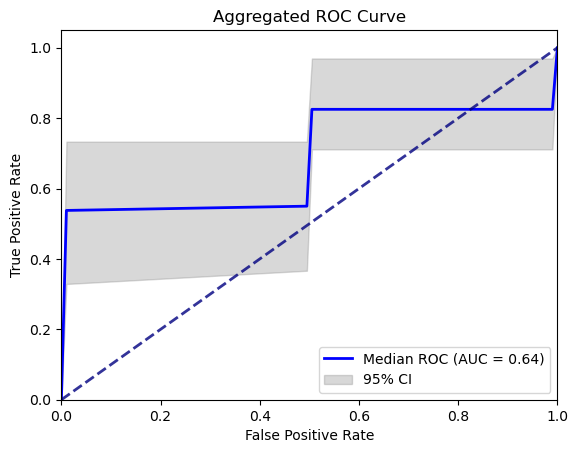

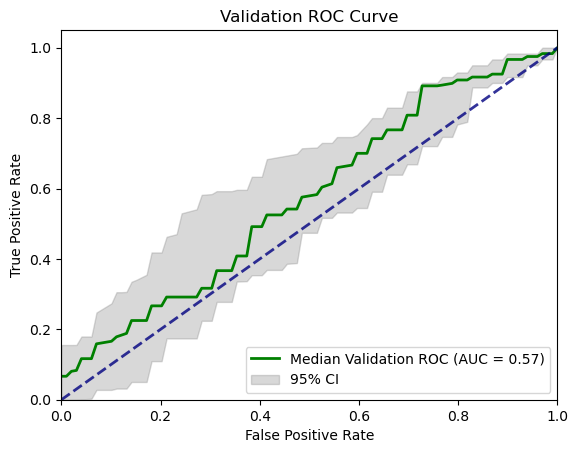

In [145]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 6) & (cat_PCAN['sct_description'] == "Familial Mediterranean fever (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(6, 0, n_runs=10, n_estimators=200)
baseline.validate_and_plot(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1),
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 6) & (cat_PCAN['sct_description'] != "Familial Mediterranean fever (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']], 6, 0)

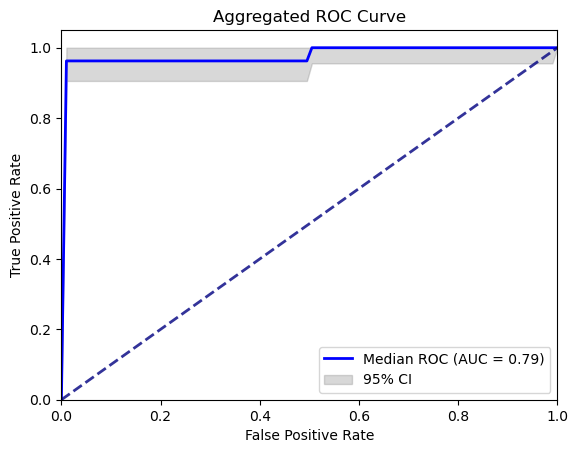

89it [00:03, 27.97it/s]


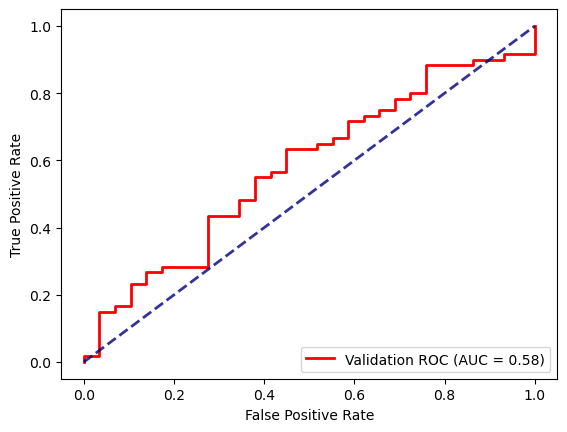

In [146]:
from utils.AdaptmsClassifier import AdaptmsClassifierDF
#Initialize the classifier
adaptms = AdaptmsClassifierDF(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 6) & (cat_PCAN['sct_description'] == "Familial Mediterranean fever (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot(6, 0, n_runs=10, topn_features=100)

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_dataframe(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1).loc[
                                pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 6) & (cat_PCAN['sct_description'] != "Familial Mediterranean fever (disorder)")], cat_PCAN[cat_PCAN['train_test'] == 'test']]).index], 
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 6) & (cat_PCAN['sct_description'] != "Familial Mediterranean fever (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']])
adaptms.plot_validation_roc(6, 0)

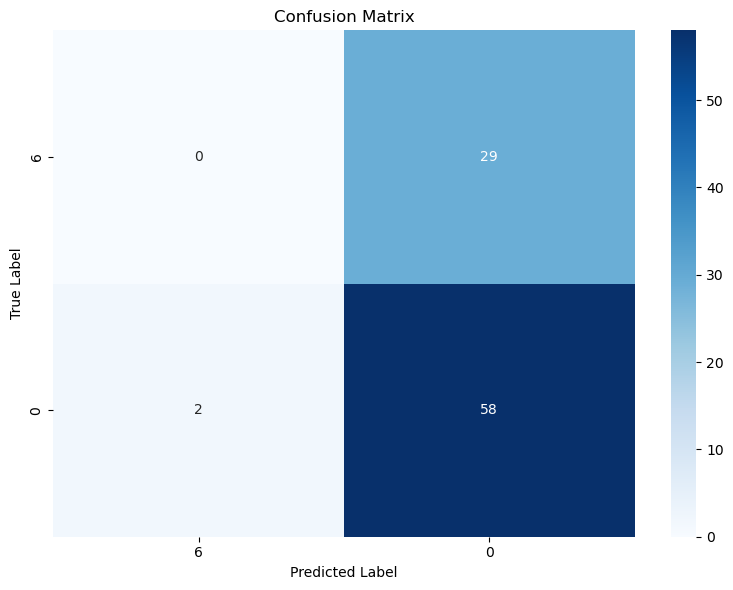

In [147]:
adaptms.plot_confusion_matrix(6,0 ,normalize=False)

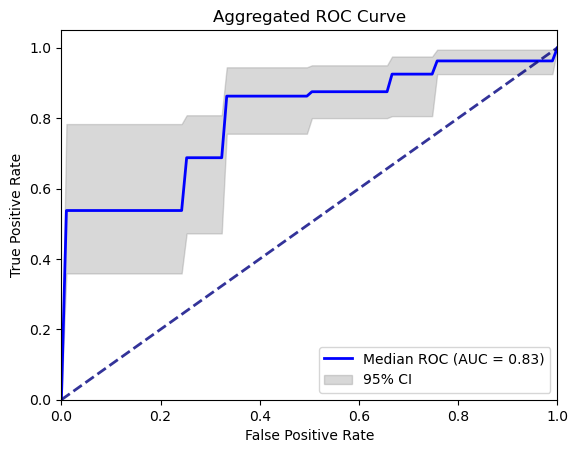

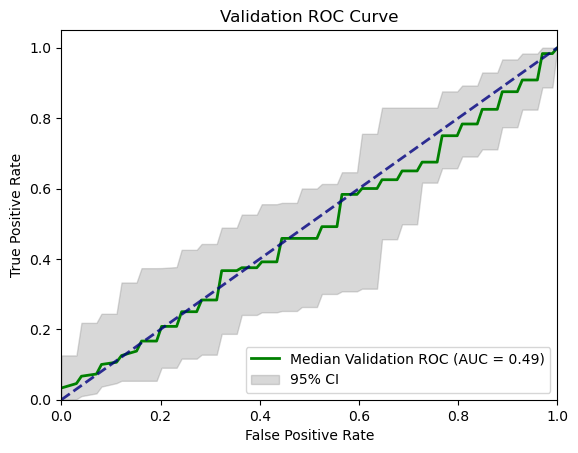

In [150]:
from utils.BaselineClassifier import BaselineClassifier
# Initialize the classifier
baseline = BaselineClassifier(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 37) & (cat_PCAN['sct_description'] == "Adrenogenital disorder (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

# Perform classification 10 times and plot the aggregated ROC curve
baseline.classify_and_plot(37, 0, n_runs=10, n_estimators=200)
baseline.validate_and_plot(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1),
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 37) & (cat_PCAN['sct_description'] != "Adrenogenital disorder (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']], 37, 0)

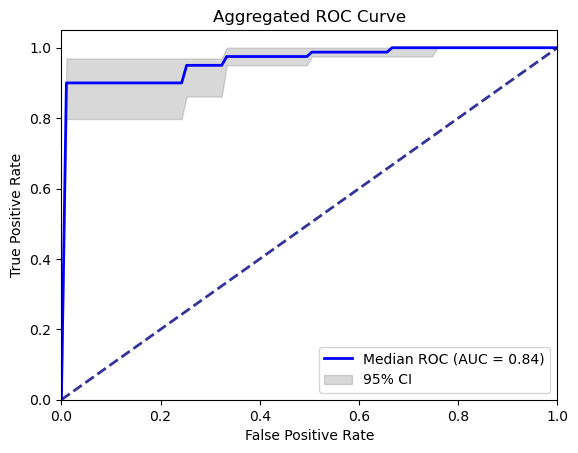

85it [00:02, 31.46it/s]


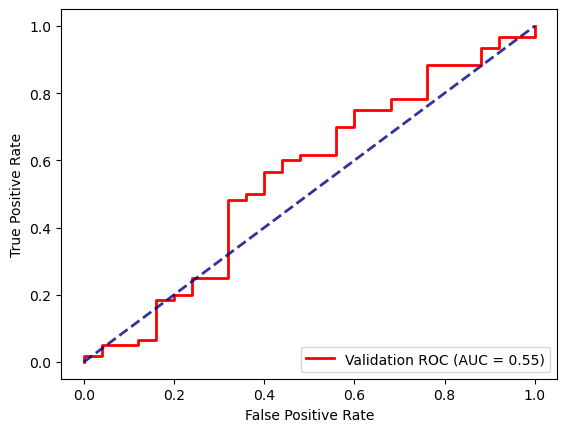

In [151]:
from utils.AdaptmsClassifier import AdaptmsClassifierDF
#Initialize the classifier
adaptms = AdaptmsClassifierDF(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1), 
                              pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 37) & (cat_PCAN['sct_description'] == "Adrenogenital disorder (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'train']])[['cluster']], gene_dict_PCAN, between='cluster')

#Perform classification 10 times and plot the aggregated ROC curve
adaptms.classify_and_plot(37, 0, n_runs=10, topn_features=100)

#Perform verification on 10 selected models and plot the aggregated ROC curve
adaptms.classify_dataframe(prot_PCAN.dropna(thresh=0.2 * prot_PCAN.shape[0], axis=1).loc[
                                pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 37) & (cat_PCAN['sct_description'] != "Adrenogenital disorder (disorder)")], cat_PCAN[cat_PCAN['train_test'] == 'test']]).index], 
                           pd.concat([cat_PCAN[(cat_PCAN['cluster'] == 37) & (cat_PCAN['sct_description'] != "Adrenogenital disorder (disorder)")],
                              cat_PCAN[cat_PCAN['train_test'] == 'test']])[['cluster']])
adaptms.plot_validation_roc(37, 0)

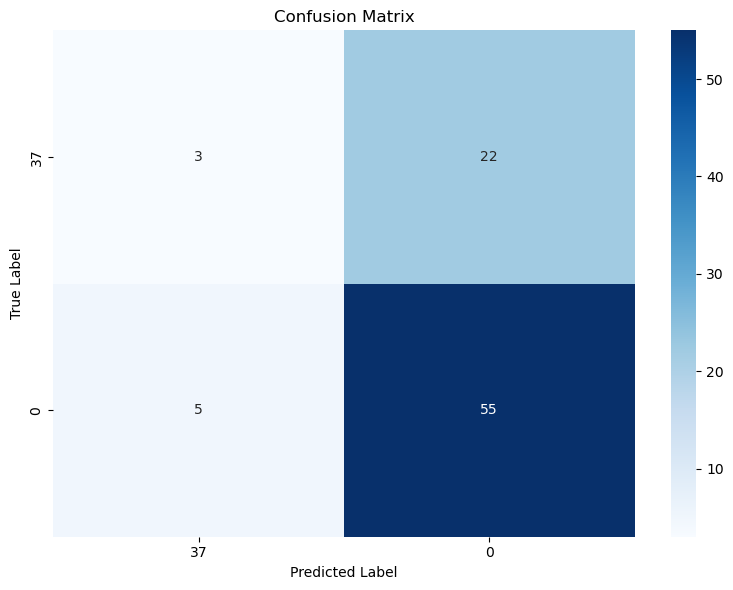

In [153]:
adaptms.plot_confusion_matrix(37,0 ,normalize=False)